# DRY BEANS CLASSIFICATION USING MACHINE LEARNING AND AI TECHNIQUES

## Data Pre-processing and Visualisation

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data processing
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import RobustScaler
import warnings  # For managing warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder  # For converting categorical class variable to numerical
import sklearn  # For machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For feature importance check
from sklearn.svm import SVC  # For Support Vector Machine
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from sklearn import metrics  # For evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Import the data
data= pd.read_csv(r"Dry_Bean_Dataset.csv")

### Exploring the dataset

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Correcting the typo error of one of the column names from 'AspectRation' to 'AspectRatio'
data = data.rename(columns={'AspectRation': 'AspectRatio'})

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Data dimensionality
data.shape

(13611, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Descriptive Statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Area,13611.0,NaN,NaN,NaN,53048.284549,29324.095717,20420.0,36328.0,44652.0,61332.0,254616.0
Perimeter,13611.0,NaN,NaN,NaN,855.283459,214.289696,524.736,703.5235,794.941,977.213,1985.37
MajorAxisLength,13611.0,NaN,NaN,NaN,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,NaN,NaN,NaN,202.270714,44.970091,122.512653,175.84817,192.431733,217.031741,460.198497
AspectRatio,13611.0,NaN,NaN,NaN,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,NaN,NaN,NaN,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,NaN,NaN,NaN,53768.200206,29774.915817,20684.0,36714.5,45178.0,62294.0,263261.0
EquivDiameter,13611.0,NaN,NaN,NaN,253.06422,59.17712,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,NaN,NaN,NaN,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,NaN,NaN,NaN,0.987143,0.00466,0.919246,0.98567,0.988283,0.990013,0.994677


In [ ]:
# Checking for missing values
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There are no missing values in the data.

In [ ]:
# Check for total number of duplicated rows
data.duplicated().sum()

68

In [ ]:
# Display all duplicated rows including their first occurrence
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
5504  33518    702.956       277.571399       154.305581     1.798842   
5505  33518    702.956       277.571399       154.305581     1.798842   
5508  33954    716.750       277.368480       156.356326     1.773951   
5509  33954    716.750       277.368480       156.356326     1.773951   
5547  38427    756.323       306.533886       160.591784     1.908777   
...     ...        ...              ...              ...          ...   
7285  63948    996.497       412.297178       198.877557     2.073121   
7339  65766   1035.842       406.416622       207.242369     1.961069   
7340  65766   1035.842       406.416622       207.242369     1.961069   
7341  65781   1039.257       409.713859       204.992832     1.998674   
7342  65781   1039.257       409.713859       204.992832     1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5504      0.831240       34023     206.5827

In [ ]:
# Keep the first occurrence of each duplicate
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
data.duplicated().sum()

0

Duplicates removed

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRatio      13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(14), i

In [ ]:
# Knowing the distinct types of beans classes
data.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

### Univariate Analysis

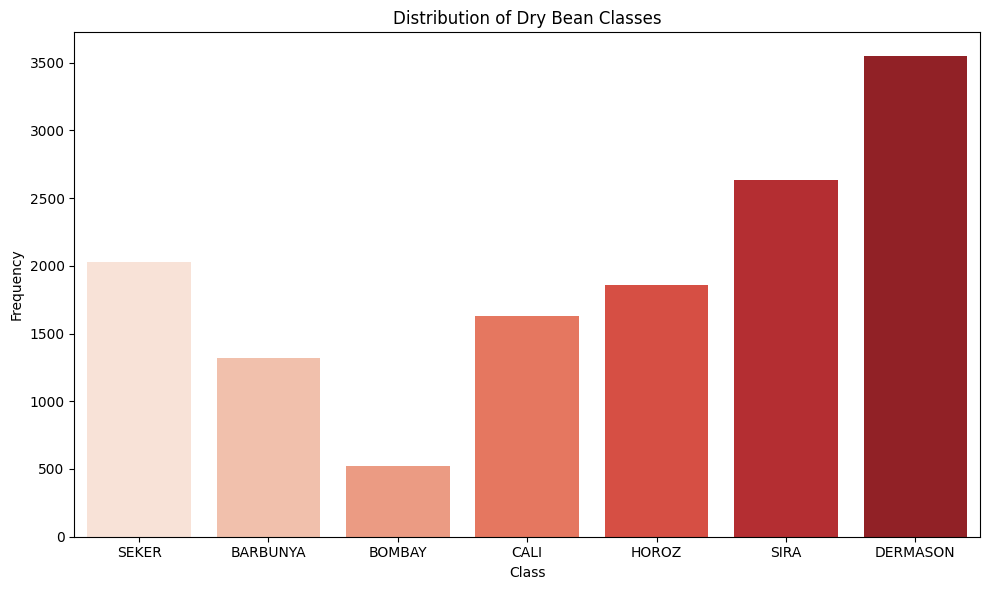

In [ ]:
# Visualize data distributions
## Categorical Data Visualization: Creating a count plot for the categorical column 'Class'
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data, palette='Reds')
# Set plot title and labels
plt.title('Distribution of Dry Bean Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
# Display the plot
plt.xticks()
plt.tight_layout()
plt.show()

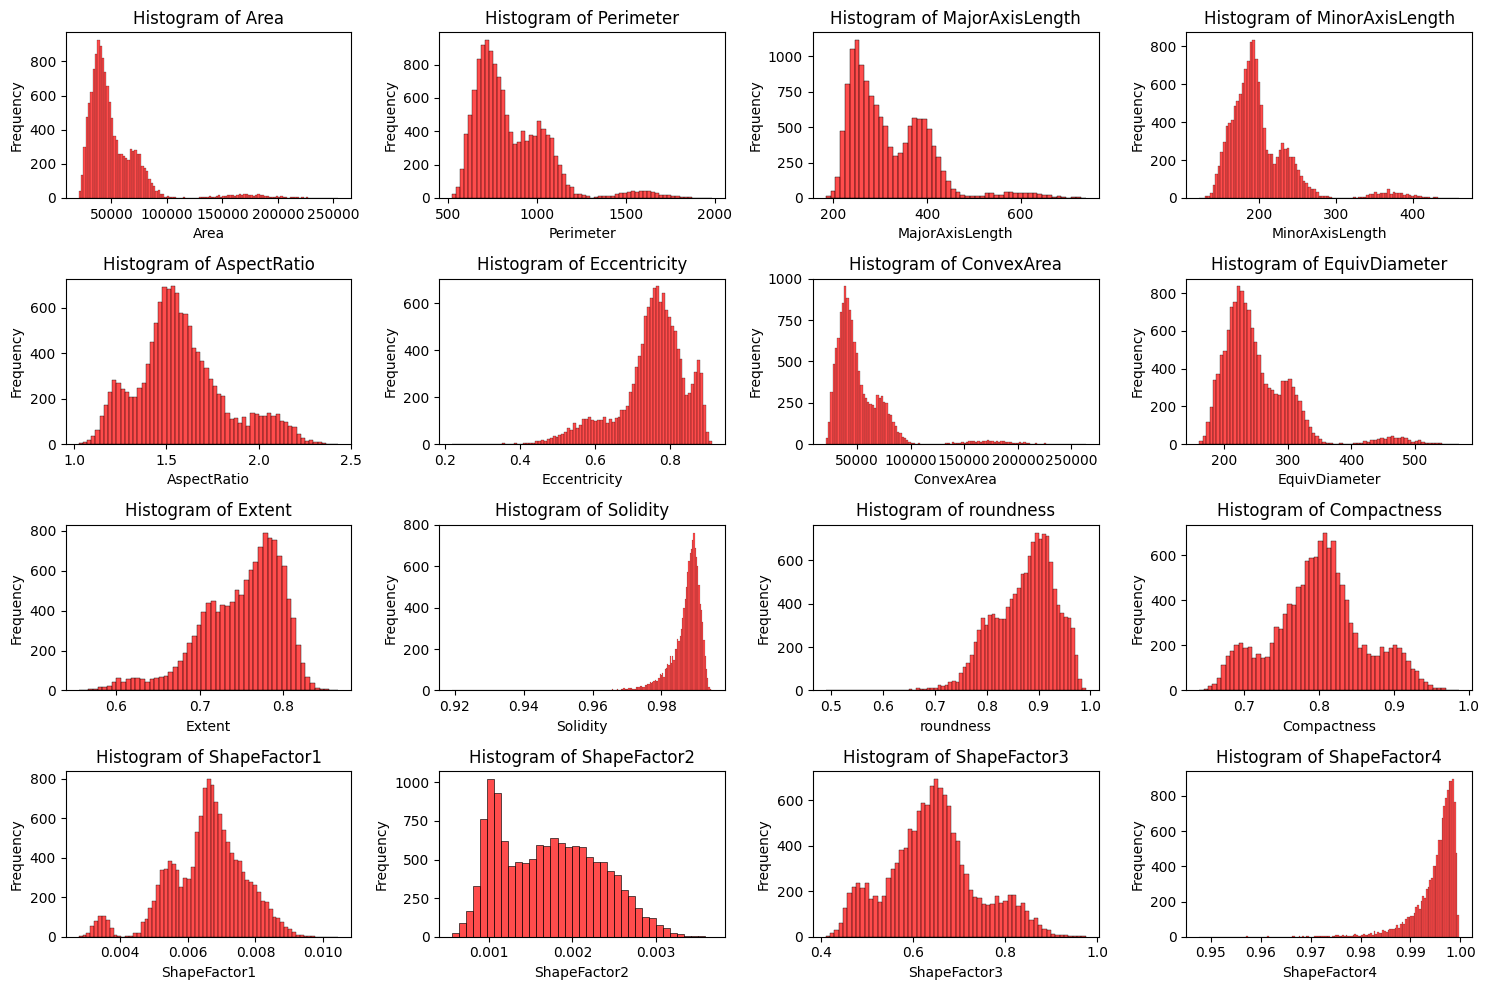

In [ ]:
# Visualize data distributions
## Numerical Data Visualization
numerical_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                  'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(15,10))
# Flatten the axes array for easier iteration
axes= axs.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(x=data[column], ax=axes[i], color= 'red', alpha = 0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

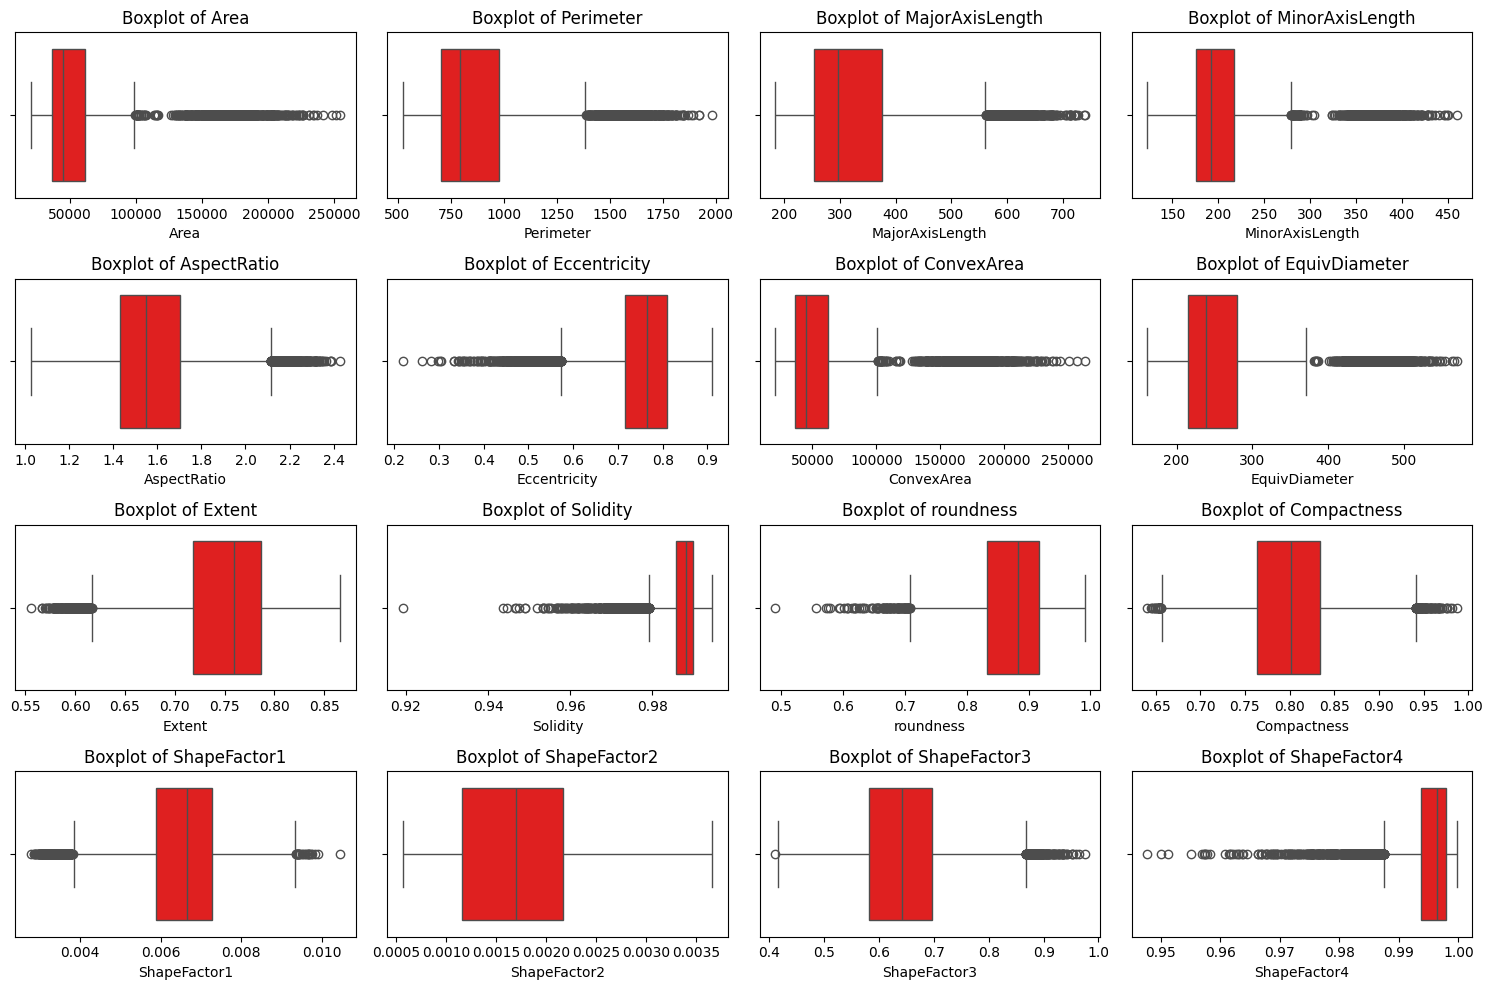

In [ ]:
## Numerical Data Visualization
fig, axs = plt.subplots(nrows=4,ncols=4,figsize=(15,10))
# Flatten the axes array for easier iteration
axes= axs.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i], color= 'red')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Dealing with Categorical Variable

In [ ]:
label_encoder = LabelEncoder()
data['Class_encoded'] = label_encoder.fit_transform(data['Class'])

data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


In [ ]:
Class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
Class_mapping

{'BARBUNYA': 0,
 'BOMBAY': 1,
 'CALI': 2,
 'DERMASON': 3,
 'HOROZ': 4,
 'SEKER': 5,
 'SIRA': 6}

In [ ]:
# Dropping the Class variable since it has been encoded
data = data.drop(['Class'], axis=1)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


### Bivariate Analysis

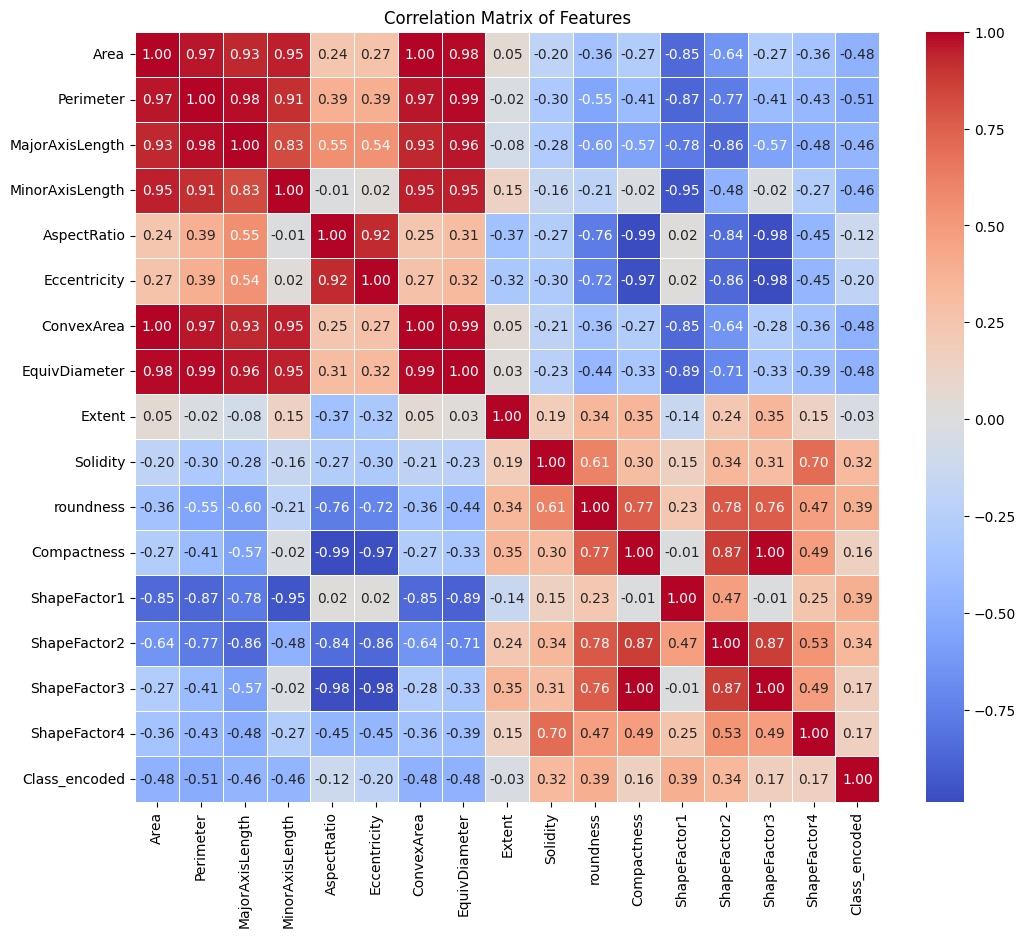

In [ ]:
# Correlation analysis of the features
# Calculate correlation matrix
corr_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, fmt=".2f", annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Dropping the ConvexArea variable since it is the same as Area
data = data.drop(['ConvexArea'], axis=1)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


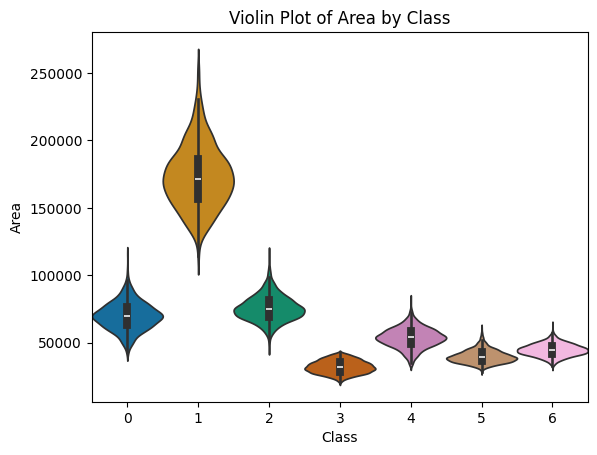

In [ ]:
sns.violinplot(x=data['Class_encoded'], y=data['Area'],width=1,palette='colorblind')
plt.xlabel('Class')
plt.ylabel('Area')
plt.title('Violin Plot of Area by Class')
plt.show()

In [ ]:
sns.violinplot(x=data['Class_encoded'], y=data['ShapeFactor1'],width=1,palette='colorblind')
plt.xlabel('Class')
plt.ylabel('ShapeFactor1')
plt.title('Violin Plot of ShapeFactor1 by Class')
plt.show()

In [ ]:
sns.violinplot(x=data['Class_encoded'], y=data['ShapeFactor2'],width=1,palette='colorblind')
plt.xlabel('Class')
plt.ylabel('ShapeFactor2')
plt.title('Violin Plot of ShapeFactor2 by Class')
plt.show()

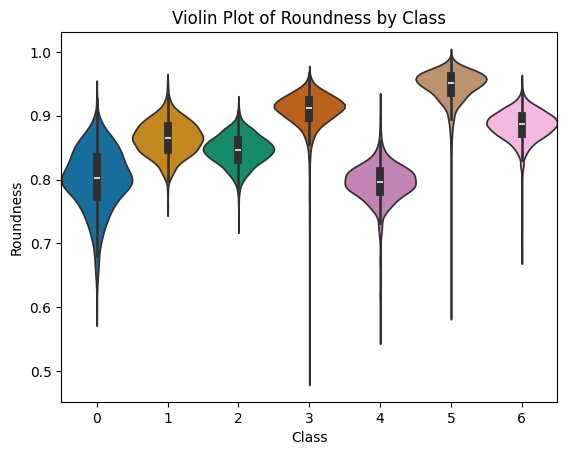

In [ ]:
sns.violinplot(x=data['Class_encoded'], y=data['roundness'],width=1,palette='colorblind')
plt.xlabel('Class')
plt.ylabel('Roundness')
plt.title('Violin Plot of Roundness by Class')
plt.show()

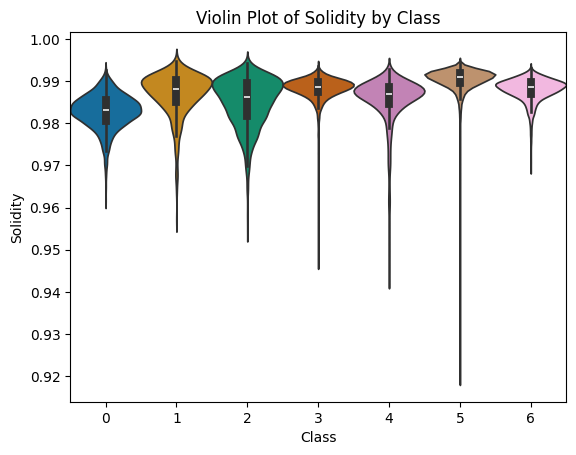

In [ ]:
sns.violinplot(x=data['Class_encoded'], y=data['Solidity'],width=1,palette='colorblind')
plt.xlabel('Class')
plt.ylabel('Solidity')
plt.title('Violin Plot of Solidity by Class')
plt.show()

### Multivariate Analysis


In [ ]:
sns.pairplot(data, height=2, aspect = 2, corner=True)

# Feature Engineering

## Splitting the Data

In [ ]:
X = data.iloc[:, :-1]  # All features excluding the encoded target
y = data.iloc[:, -1]  # Target variable

In [ ]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Class_encoded, dtype: int64

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9480, 15)
(4063, 15)
(9480,)
(4063,)


In [ ]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1746,45125,894.185,273.898295,211.270119,1.296437,0.636417,239.697590,0.675504,0.966833,0.709206,0.875134,0.006070,0.002196,0.765859,0.992887
6489,54046,951.099,364.519035,193.599822,1.882848,0.847303,262.323282,0.756354,0.969435,0.750796,0.719642,0.006745,0.001116,0.517885,0.975099
13085,37583,720.715,277.709633,172.681872,1.608215,0.783170,218.751370,0.722181,0.992238,0.909231,0.787698,0.007389,0.001755,0.620468,0.997847
2873,72924,1041.775,389.401218,238.910124,1.629907,0.789670,304.712521,0.725468,0.987742,0.844369,0.782516,0.005340,0.001235,0.612331,0.998042
3547,165004,1583.383,607.883170,352.882975,1.722620,0.814252,458.355340,0.699229,0.967119,0.827051,0.754019,0.003684,0.000735,0.568544,0.979386


In [ ]:
y_train

1746     5
6489     4
13085    3
2873     0
3547     1
        ..
5191     2
13486    3
5390     2
860      5
7336     4
Name: Class_encoded, Length: 9480, dtype: int64

In [ ]:
y_test

811      5
3942     2
12563    3
3528     1
12552    3
        ..
4269     2
7493     6
13303    3
3148     0
2928     0
Name: Class_encoded, Length: 4063, dtype: int64

## Feature Scaling

Most of the columns contain lots of outliers which can affect the modelling results. They are:
Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'ShapeFactor4'. Hence, we will be using Robust scaler to reduce the impact of the outliers rather than removing them as they are legitimate and the models could be very sensitive to them.
Also, it is important to scale the data so that the learners ca

In [ ]:
# Applying robust scaler
scaler = RobustScaler()

# Fit the scaler to the training data only
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.021952,0.365037,-0.179728,0.450337,-0.920714,-1.343303,0.022737,-1.235469,-4.927389,-2.065323,1.027146,-0.412287,0.487114,1.078241,-0.831565
1,0.375760,0.572015,0.553939,0.023995,1.211014,0.878029,0.371612,-0.041971,-4.329791,-1.570507,-1.142392,0.074954,-0.574479,-1.088006,-5.036688
2,-0.277165,-0.265818,-0.148871,-0.480705,0.212667,0.202500,-0.300241,-0.546429,0.907556,0.314461,-0.192822,0.540382,0.053412,-0.191858,0.340841
3,1.124463,0.901775,0.755386,1.117223,0.291520,0.270962,1.025228,-0.497907,-0.125094,-0.457225,-0.265133,-0.939315,-0.457347,-0.262948,0.386944
4,4.776367,2.871431,2.524219,3.867114,0.628551,0.529898,3.394305,-0.885242,-4.861774,-0.663267,-0.662743,-2.134799,-0.949167,-0.645455,-4.023232


### Feature Importance

Apply feature importance analysis to prune less significant features. Use the RandomForestClassifier to rank features based on importance.

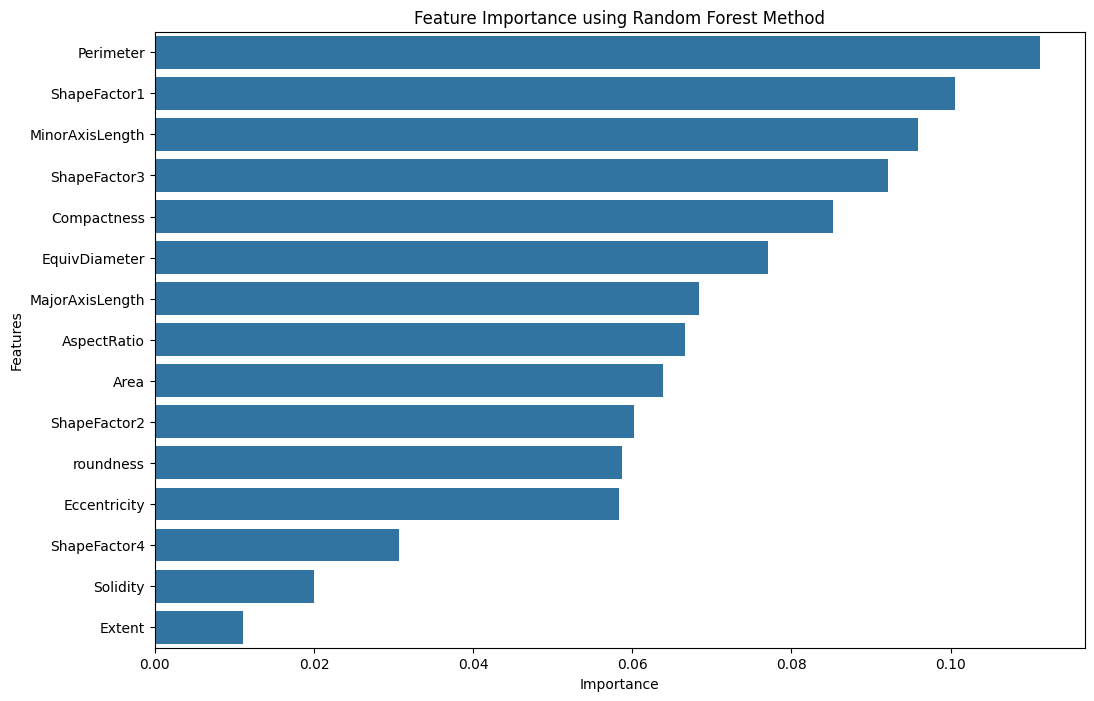

In [ ]:
# Initializing the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf.feature_importances_

# Converting the importances into a DataFrame for easier handling
features_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_data = features_data.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_data)
plt.title('Feature Importance using Random Forest Method')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
print(features_data)

            Feature  Importance
1         Perimeter    0.111293
11     ShapeFactor1    0.100570
3   MinorAxisLength    0.095911
13     ShapeFactor3    0.092098
10      Compactness    0.085226
6     EquivDiameter    0.077079
2   MajorAxisLength    0.068357
4       AspectRatio    0.066576
0              Area    0.063810
12     ShapeFactor2    0.060274
9         roundness    0.058689
5      Eccentricity    0.058368
14     ShapeFactor4    0.030725
8          Solidity    0.019995
7            Extent    0.011030


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Top 7 Selected features based on RF output
selected_features = ['Perimeter', 'MinorAxisLength', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'MajorAxisLength']

# Features and target variable
X_df = data[selected_features]
y_df = data['Class_encoded']

# Splitting data into training and testing sets
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [ ]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the training data only
scaler.fit(X_df_train)

# Transform both training and test datasets
X_df_train = scaler.transform(X_df_train)
X_df_test = scaler.transform(X_df_test)


In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_df_train, y_df_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_df_test)

# Evaluation
print("Accuracy:", accuracy_score(y_df_test, y_pred))
print("\nClassification Report:\n", classification_report(y_df_test, y_pred))


Accuracy: 0.9000738370662072

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       396
           1       1.00      1.00      1.00       161
           2       0.88      0.90      0.89       473
           3       0.90      0.92      0.91      1065
           4       0.95      0.94      0.94       553
           5       0.93      0.93      0.93       618
           6       0.85      0.84      0.84       797

    accuracy                           0.90      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063



In [ ]:
# Full feature set for comparison
# Training on the full dataset
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_full.fit(X_train, y_train)

# Predictions and evaluation on the full dataset
y_pred_full = rf_model_full.predict(X_test)
print("Accuracy with full features:", accuracy_score(y_test, y_pred_full))
print("\nClassification Report with full features:\n", classification_report(y_test, y_pred_full))


Accuracy with full features: 0.9217327098203298

Classification Report with full features:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       396
           1       1.00      1.00      1.00       161
           2       0.93      0.93      0.93       473
           3       0.91      0.93      0.92      1065
           4       0.95      0.95      0.95       553
           5       0.94      0.94      0.94       618
           6       0.88      0.86      0.87       797

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



Prediction accuracy obtained with full features is higher than with few features. Hence, the full features would be used for subsequent analysis. However, PCA would also be tested.

### Dimensionality Reduction with PCA

Considering the dataset is not excessively large but has a substantial number of features, applying PCA might help in reducing the dimensionality. PCA will transform the data into principal components that capture the most variance, which might help in improving the performance of models.y.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.999)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Optionally, check how many components were kept
print("PCA selected components:", pca.n_components_)

PCA selected components: 8


In [ ]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_pca)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest with PCA:", accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest with PCA: 0.9251784395766675

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       396
           1       1.00      1.00      1.00       161
           2       0.92      0.94      0.93       473
           3       0.92      0.93      0.92      1065
           4       0.95      0.95      0.95       553
           5       0.95      0.95      0.95       618
           6       0.88      0.87      0.87       797

    accuracy                           0.93      4063
   macro avg       0.94      0.93      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

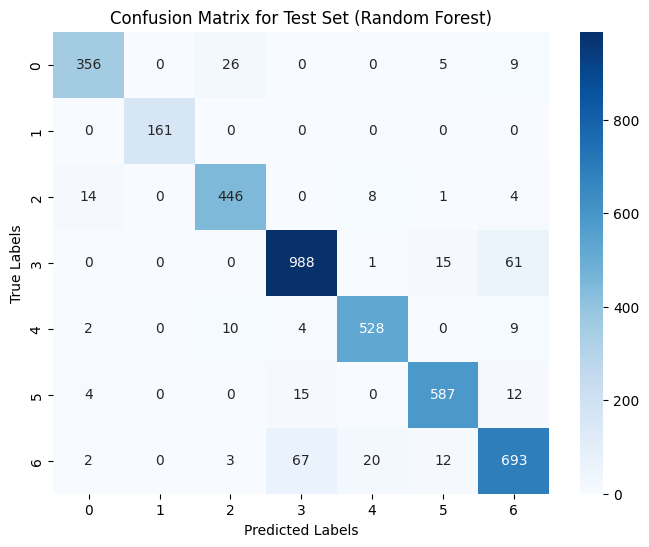

In [ ]:
# Plotting the confusion matrix for the test set
plot_confusion_matrix(cm_test, title='Confusion Matrix for Test Set (Random Forest)', labels=[0,1,2,3,4,5,6])

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.52412943 0.27428201 0.11200343 0.0388005  0.02959518 0.01084993
 0.0065075  0.00326337]


In [ ]:
print("Feature Importance:", rf_classifier.feature_importances_)

Feature Importance: [0.29033052 0.22374002 0.04796054 0.04627831 0.0754483  0.16221613
 0.0882567  0.06576947]


PCA result gave more accuracy.

## TASK ONE

#### Support Vector Machine (SVM)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.021952,0.365037,-0.179728,0.450337,-0.920714,-1.343303,0.022737,-1.235469,-4.927389,-2.065323,1.027146,-0.412287,0.487114,1.078241,-0.831565
1,0.375760,0.572015,0.553939,0.023995,1.211014,0.878029,0.371612,-0.041971,-4.329791,-1.570507,-1.142392,0.074954,-0.574479,-1.088006,-5.036688
2,-0.277165,-0.265818,-0.148871,-0.480705,0.212667,0.202500,-0.300241,-0.546429,0.907556,0.314461,-0.192822,0.540382,0.053412,-0.191858,0.340841
3,1.124463,0.901775,0.755386,1.117223,0.291520,0.270962,1.025228,-0.497907,-0.125094,-0.457225,-0.265133,-0.939315,-0.457347,-0.262948,0.386944
4,4.776367,2.871431,2.524219,3.867114,0.628551,0.529898,3.394305,-0.885242,-4.861774,-0.663267,-0.662743,-2.134799,-0.949167,-0.645455,-4.023232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,1.534628,1.178174,1.233638,1.089162,1.223737,0.884527,1.347352,0.561572,0.602079,-0.539374,-1.053326,-0.905948,-0.763878,-1.007390,-0.493177
9476,-0.158264,-0.167056,-0.129892,-0.188866,-0.123910,-0.131646,-0.168289,0.213129,0.282138,0.344489,0.141531,0.187949,0.144604,0.142947,0.492018
9477,1.801858,1.319353,1.301342,1.441581,0.947298,0.733518,1.546538,0.365238,0.701908,-0.443949,-0.844223,-1.129990,-0.743338,-0.815327,-0.560163
9478,-0.243731,-0.299650,-0.399953,0.143570,-1.116948,-1.795707,-0.262621,-0.104846,0.482266,0.848255,1.326828,-0.159384,0.844142,1.410673,0.572208


In [ ]:
y_train

1746     5
6489     4
13085    3
2873     0
3547     1
        ..
5191     2
13486    3
5390     2
860      5
7336     4
Name: Class_encoded, Length: 9480, dtype: int64

##### Using Grid Search with Cross Validation to choose the right Parameters

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pca = PCA(n_components=0.999)

In [ ]:
# Define the parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

pipeline = Pipeline([
    ('pca', PCA(n_components=0.999)),
    ('svm', SVC(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)


In [ ]:
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy and classification report
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best cross-validation score: 0.93
Accuracy: 0.9313315284272705

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       396
           1       1.00      1.00      1.00       161
           2       0.94      0.95      0.94       473
           3       0.92      0.93      0.92      1065
           4       0.96      0.95      0.96       553
           5       0.96      0.95      0.96       618
           6       0.88      0.88      0.88       797

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

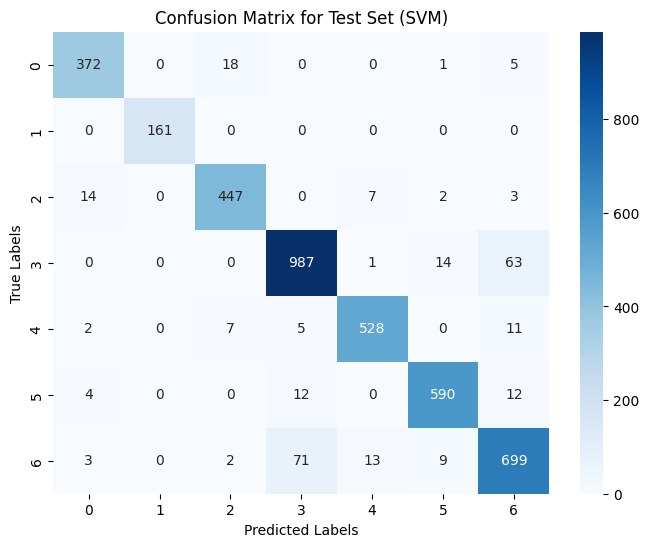

In [ ]:
# Plotting the confusion matrix for the test set
plot_confusion_matrix(cm_test, title='Confusion Matrix for Test Set (SVM)', labels=[0,1,2,3,4,5,6])


## TASK 2

Multilayer Perceptron (MLP) Model Configuration and Training
Parameters of the MLP Model:

Hidden Layers and Neurons: Configured with 4 hidden layers with respective sizes of 25, 18, 10, and 5 neurons. This architecture facilitates a deep learning approach, enabling the model to learn complex patterns from the data at multiple abstraction levels.
Activation Function: 'ReLU' (Rectified Linear Activation) is used for hidden layers, which helps prevent the vanishing gradient problem and speeds up training.
Optimizer: 'Adam', an adaptive learning rate optimizer, known for its effectiveness in handling large datasets and converging quickly.
Training Iterations: Set to 300 iterations to ensure the network has sufficient opportunity to learn and adjust its weights adequately before terminating training.
Training Method:

The MLP is trained using backpropagation with gradient descent. This method iteratively adjusts the weights of the network to minimize the prediction error, measured by a loss function, over several training epochs.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.021952,0.365037,-0.179728,0.450337,-0.920714,-1.343303,0.022737,-1.235469,-4.927389,-2.065323,1.027146,-0.412287,0.487114,1.078241,-0.831565
1,0.375760,0.572015,0.553939,0.023995,1.211014,0.878029,0.371612,-0.041971,-4.329791,-1.570507,-1.142392,0.074954,-0.574479,-1.088006,-5.036688
2,-0.277165,-0.265818,-0.148871,-0.480705,0.212667,0.202500,-0.300241,-0.546429,0.907556,0.314461,-0.192822,0.540382,0.053412,-0.191858,0.340841
3,1.124463,0.901775,0.755386,1.117223,0.291520,0.270962,1.025228,-0.497907,-0.125094,-0.457225,-0.265133,-0.939315,-0.457347,-0.262948,0.386944
4,4.776367,2.871431,2.524219,3.867114,0.628551,0.529898,3.394305,-0.885242,-4.861774,-0.663267,-0.662743,-2.134799,-0.949167,-0.645455,-4.023232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,1.534628,1.178174,1.233638,1.089162,1.223737,0.884527,1.347352,0.561572,0.602079,-0.539374,-1.053326,-0.905948,-0.763878,-1.007390,-0.493177
9476,-0.158264,-0.167056,-0.129892,-0.188866,-0.123910,-0.131646,-0.168289,0.213129,0.282138,0.344489,0.141531,0.187949,0.144604,0.142947,0.492018
9477,1.801858,1.319353,1.301342,1.441581,0.947298,0.733518,1.546538,0.365238,0.701908,-0.443949,-0.844223,-1.129990,-0.743338,-0.815327,-0.560163
9478,-0.243731,-0.299650,-0.399953,0.143570,-1.116948,-1.795707,-0.262621,-0.104846,0.482266,0.848255,1.326828,-0.159384,0.844142,1.410673,0.572208


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the training data
pca = PCA(n_components=0.999)  # Retains 99.9% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Initialize the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', max_iter=300, random_state=42)

# Train the model
mlp.fit(X_train_pca, y_train)

MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), max_iter=300, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_pca)

# Print accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9296086635491017
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       396
           1       1.00      1.00      1.00       161
           2       0.96      0.93      0.95       473
           3       0.92      0.93      0.93      1065
           4       0.94      0.97      0.95       553
           5       0.94      0.96      0.95       618
           6       0.89      0.86      0.88       797

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [ ]:
# Confusion matrix computation
cfm_test_mlp = confusion_matrix(y_test, y_pred)

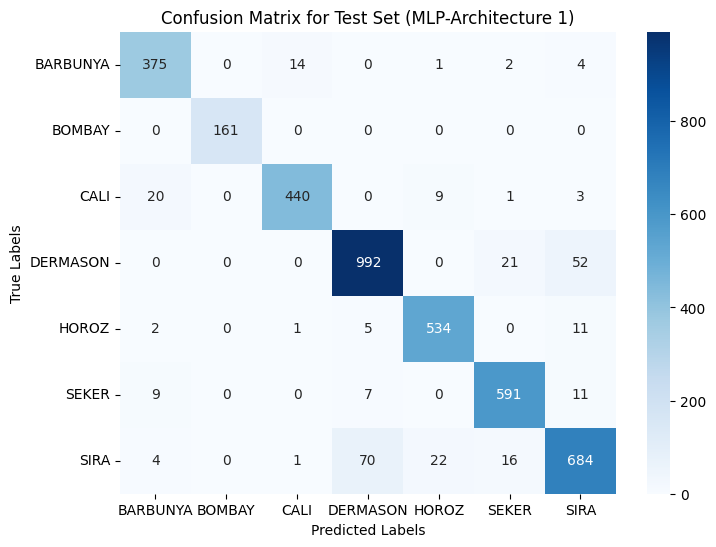

In [ ]:
# Plotting the confusion matrix for the test set
plot_confusion_matrix(cfm_test_mlp, title='Confusion Matrix for Test Set (MLP-Architecture 1)', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

### Optimization of other hyperparameters of MLPClassifier while keeping the hidden layer sizes fixed, was done using GridSearchCV. This is to enhance performance, reduce overfitting, or accelerate convergence.

In [ ]:
# Define a pipeline with PCA and MLP
pipeline = Pipeline([
    ('pca', PCA(n_components=0.999)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), random_state=42))
])

In [ ]:
param_grid = {
    'mlp__activation': ['tanh', 'relu'],  # Activation functions
    'mlp__solver': ['adam', 'sgd'],  # Optimization algorithms
    'mlp__max_iter': [200, 300, 500, 1000],  # Maximum iterations
    'mlp__learning_rate_init': [0.001, 0.01]  # Learning rate
}


In [ ]:
# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.999)),
                                       ('mlp',
                                        MLPClassifier(hidden_layer_sizes=(25,
                                                                          18,
                                                                          10,
                                                                          5),
                                                      random_state=42))]),
             param_grid={'mlp__activation': ['tanh', 'relu'],
                         'mlp__learning_rate_init': [0.001, 0.01],
                         'mlp__max_iter': [200, 300, 500, 1000],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters found
print("Best parameters set:")
print(grid_search.best_params_)

# Best model obtained from grid search
best_mlp = grid_search.best_estimator_

# Test set predictions
y_pred1 = best_mlp.predict(X_test)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))


Best parameters set:
{'mlp__activation': 'tanh', 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 200, 'mlp__solver': 'adam'}
Best cross-validation score: 0.93
Test Accuracy: 0.9249323160226434
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       396
           1       1.00      1.00      1.00       161
           2       0.94      0.94      0.94       473
           3       0.93      0.91      0.92      1065
           4       0.95      0.95      0.95       553
           5       0.95      0.96      0.95       618
           6       0.86      0.87      0.86       797

    accuracy                           0.92      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.92      0.92      4063



In [ ]:
# Confusion matrix computation
cm_test_mlp = confusion_matrix(y_test, y_pred1)


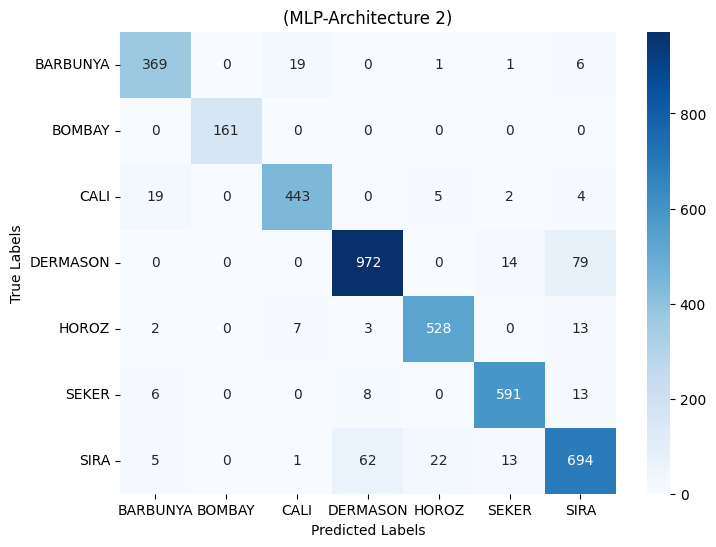

In [ ]:
# Plotting the confusion matrix for the test set
plot_confusion_matrix(cm_test_mlp, title='(MLP-Architecture 2)', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

## TASK 3- CNN

Since CNN expect input data to have multiple dimensions, the steps taken involve reshaping the data to make it suitable for input into a 1D Convolutional Neural Network (CNN), constructing the CNN model, training it, and evaluating its performance.  

In [ ]:
# Splitting into training and testing set (train 70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [ ]:
# size for the sets
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)

size of X_train: (9480, 15)
size of X_test: (4063, 15)
size of y_train: (9480,)
size of y_test: (4063,)


In [ ]:
# Applying robustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize PCA to retain 99.9% of variance
pca = PCA(n_components=0.999)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### Reshaping the Data

CNNs with 1D convolution layers expect input data to have 3 dimensions specifically for Conv1D: samples, time steps, features. So, the data previously scaled data is reshaped accordingly.

Each data sample is reshaped to (length_of_sample, 1), where length_of_sample is the number of features per instance. The 1 signifies a single channel, similar to how image data might have multiple channels (e.g., RGB).

In [ ]:
# Reshaping the data to add a 'channels' dimension, which is 1 in this case

# Reshape data for Conv1D: (num_samples, num_features, 1)
X_train_reshaped = np.array(X_train_pca).reshape((X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_reshaped = np.array(X_test_pca).reshape((X_test_pca.shape[0], X_test_pca.shape[1], 1))


In [ ]:
print("X Train Shape: ", X_train_reshaped.shape)
print("X Test Shape: ", X_test_reshaped.shape)

X Train Shape:  (9480, 8, 1)
X Test Shape:  (4063, 8, 1)


#### Defining the CNN Architecture

1D CNN architecture for classification was defined using TensorFlow and Keras.

In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU


In [ ]:
# Initializing a sequential model
cnn_model = Sequential()

A sequential model was used because it allows for stacking of layers in a sequence where each layer has weights connected only to the next layer.

In [ ]:
# Adding Conv1D layers with the adjusted input shape
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))
cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))


In [ ]:
# Adding MaxPooling, Dropout, and Flatten layers
cnn_model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())

# Adding Dense layers
cnn_model.add(Dense(256, activation=LeakyReLU(alpha=0.001)))  # 256 neurons
cnn_model.add(Dense(512, activation=LeakyReLU(alpha=0.001)))  # 512 neurons
cnn_model.add(Dense(7, activation='softmax'))  # 7 output classes

# Model Compilation and Training
# Compiling the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 128)            24704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 128)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                      

In [ ]:
# Training the model
cnn_model_history = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=10, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
948/948 [==============================] - 14s 14ms/step - loss: 0.3820 - accuracy: 0.8662 - val_loss: 0.2414 - val_accuracy: 0.9163
Epoch 2/10
948/948 [==============================] - 8s 9ms/step - loss: 0.2663 - accuracy: 0.9080 - val_loss: 0.3049 - val_accuracy: 0.8826
Epoch 3/10
948/948 [==============================] - 6s 7ms/step - loss: 0.2511 - accuracy: 0.9129 - val_loss: 0.2182 - val_accuracy: 0.9222
Epoch 4/10
948/948 [==============================] - 8s 9ms/step - loss: 0.2391 - accuracy: 0.9154 - val_loss: 0.2124 - val_accuracy: 0.9276
Epoch 5/10
948/948 [==============================] - 7s 7ms/step - loss: 0.2376 - accuracy: 0.9173 - val_loss: 0.2319 - val_accuracy: 0.9222
Epoch 6/10
948/948 [==============================] - 8s 9ms/step - loss: 0.2244 - accuracy: 0.9201 - val_loss: 0.2470 - val_accuracy: 0.9161
Epoch 7/10
948/948 [==============================] - 7s 7ms/step - loss: 0.2312 - accuracy: 0.9190 - val_loss: 0.2141 - val_accuracy: 0.9244
Epoc

In [ ]:
# Overall test accuracy
test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)

127/127 [==============================] - 1s 8ms/step - loss: 0.2248 - accuracy: 0.9230
Test Accuracy: 0.9229633212089539


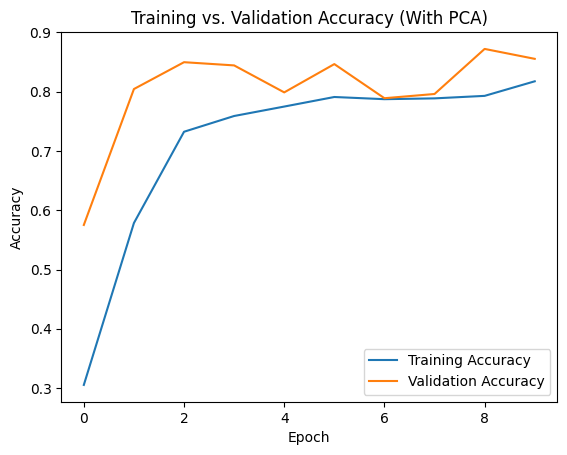

In [ ]:
# Plot training & validation accuracy
plt.plot(cnn_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy (With PCA)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

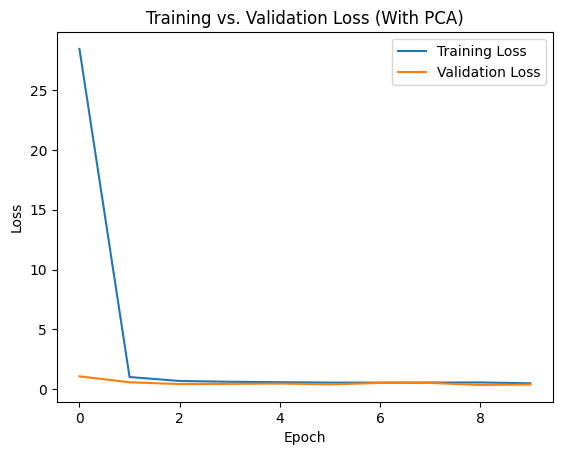

In [ ]:
# Plot training & validation loss
plt.plot(cnn_model_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss (With PCA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Without using pca

In [ ]:
X_train_reshaped2 = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped2 = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print("X Train Shape: ", X_train_reshaped2.shape)
print("X Test Shape: ", X_test_reshaped2.shape)

X Train Shape:  (9480, 15, 1)
X Test Shape:  (4063, 15, 1)


In [ ]:
# Initializing a sequential model
cnn_model1 = Sequential()

In [ ]:
# Adding Conv1D layers
cnn_model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(X_train_reshaped2.shape[1], 1)))
cnn_model1.add(Conv1D(filters=64, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))
cnn_model1.add(Conv1D(filters=128, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))


3 convolutional layers. These layers use filters to process different parts of the input data, capturing spatial hierarchies and features.

These are the key attributes of the model:

Filters: Number of output filters in the convolution.

Kernel Size: Length of the convolution window.

Padding: 'same' ensures the output has the same length as the input.

Activation: LeakyReLU allows a small, non-zero gradient when the unit is not active.

Pooling, dropout, and flattening were added to manage overfitting and prepare data for the dense layer. Below are the fuctions of each:

MaxPooling1D: Reduces the size of the input representation, making the network more manageable and less prone to overfitting.

Dropout: Randomly ignores selected neurons during training, which helps prevent overfitting.

Flatten: Transforms the format of the output from the convolutional and pooling layers to a 1D array.

In [ ]:
# Adding MaxPooling, Dropout, and Flatten layers
cnn_model1.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Flatten())

# Adding Dense layers
cnn_model1.add(Dense(256, activation=LeakyReLU(alpha=0.001)))  # 256 neurons
cnn_model1.add(Dense(512, activation=LeakyReLU(alpha=0.001)))  # 512 neurons
cnn_model1.add(Dense(7, activation='softmax'))  # 7 output classes

# Model Compilation and Training
# Compiling the model
cnn_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 15, 32)            128       
                                                                 
 conv1d_5 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 128)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                      

A Fully Connected (Dense) Layers were added to interpret features extracted by the convolutions across the sequence. The fuctions of these parameters include:

Dense: Fully connected layer.

Activation: LeakyReLU for intermediate layers to address the problem of dying neurons; 'softmax' for the output layer to get probabilities of each class.

In [ ]:
# Training the model
cnn_model1_history = cnn_model1.fit(X_train_reshaped2, y_train, epochs=10, batch_size=10, validation_data=(X_test_reshaped2, y_test))


Epoch 1/10
948/948 [==============================] - 15s 16ms/step - loss: 0.4770 - accuracy: 0.8263 - val_loss: 0.3934 - val_accuracy: 0.8513
Epoch 2/10
948/948 [==============================] - 10s 10ms/step - loss: 0.4532 - accuracy: 0.8266 - val_loss: 0.3932 - val_accuracy: 0.8467
Epoch 3/10
948/948 [==============================] - 8s 9ms/step - loss: 0.5589 - accuracy: 0.8139 - val_loss: 0.3555 - val_accuracy: 0.8693
Epoch 4/10
948/948 [==============================] - 10s 10ms/step - loss: 0.4727 - accuracy: 0.8264 - val_loss: 0.3452 - val_accuracy: 0.8747
Epoch 5/10
948/948 [==============================] - 11s 11ms/step - loss: 0.4374 - accuracy: 0.8352 - val_loss: 0.3398 - val_accuracy: 0.8735
Epoch 6/10
948/948 [==============================] - 8s 9ms/step - loss: 0.4439 - accuracy: 0.8319 - val_loss: 0.3696 - val_accuracy: 0.8590
Epoch 7/10
948/948 [==============================] - 10s 11ms/step - loss: 0.4340 - accuracy: 0.8381 - val_loss: 0.3657 - val_accuracy: 0.8

In [ ]:
# Overall test accuracy
test_loss, test_accuracy = cnn_model1.evaluate(X_test_reshaped2, y_test)
print("Test Accuracy without PCA:", test_accuracy)

127/127 [==============================] - 1s 6ms/step - loss: 0.3449 - accuracy: 0.8792
Test Accuracy without PCA: 0.879153311252594


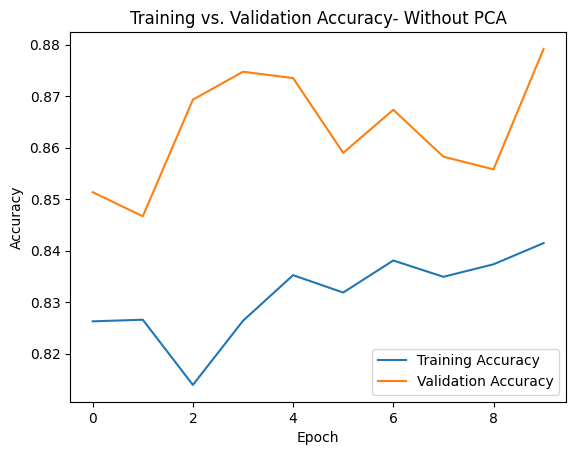

In [ ]:
# Plot training & validation accuracy
plt.plot(cnn_model1_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model1_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy- Without PCA')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

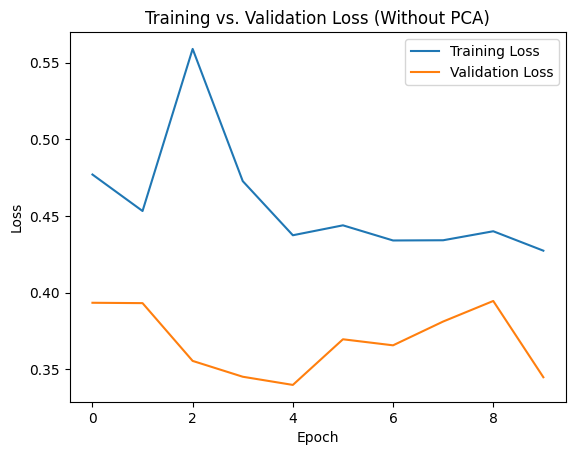

In [ ]:
# Plot training & validation loss
plt.plot(cnn_model1_history.history['loss'], label='Training Loss')
plt.plot(cnn_model1_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss (Without PCA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Explaining the Model Architecture Summary

Model Layers and Parameters:

Conv1D Layers: Three 1D convolutional layers with increasing numbers of filters: 32, 64, and 128. These layers help the model extract various levels of features from the input data, with each layer potentially capturing more complex patterns. The kernel size for all is 3, which is standard for capturing patterns over three time steps.

MaxPooling1D: This layer reduces the dimensionality of the data (halves it here), which helps in reducing computation and also controls overfitting by providing an abstracted form of the representation.

Dropout: Set at 0.5, meaning half of the neurons are randomly dropped during training. This prevents the model from becoming too dependent on any single feature and improves generalization.

Flatten: This layer flattens the output of the previous layers to form a 1D vector, which is necessary before using fully connected layers.

Dense Layers: Three fully connected layers are used. The first two have 256 and 512 neurons, respectively, and use LeakyReLU activation. These layers are meant to interpret the features extracted by the convolutions and down-sampling, deciding which features contribute to a specific output. The final dense layer with 7 units corresponds to the 7 classes of the dataset and uses a softmax activation to output probabilities of each class.

#### Further Tuning of the Hyperparameters for Higher Accuracy

#### Increasing Dropout Rate to 0.7 (With PCA)

Dropout effectively reduces model complexity by randomly turning off a proportion of neurons during training. This helps to prevent overfitting.



In [ ]:
# Initializing a sequential model
cnn_model2 = Sequential()

In [ ]:
# Adding Conv1D layers
cnn_model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))
cnn_model2.add(Conv1D(filters=128, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))


In [ ]:
# Adding MaxPooling, Dropout, and Flatten layers
cnn_model2.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
cnn_model2.add(Dropout(0.7))
cnn_model2.add(Flatten())

# Adding Dense layers
cnn_model2.add(Dense(256, activation=LeakyReLU(alpha=0.001)))  # 256 neurons
cnn_model2.add(Dense(512, activation=LeakyReLU(alpha=0.001)))  # 512 neurons
cnn_model2.add(Dense(7, activation='softmax'))  # 7 output classes

# Model Compilation and Training
# Compiling the model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 8, 32)             128       
                                                                 
 conv1d_8 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 conv1d_9 (Conv1D)           (None, 8, 128)            24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 4, 128)            0         
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                      

In [ ]:
# Training the model
cnn_model_history2 = cnn_model2.fit(X_train_reshaped, y_train, epochs=10, batch_size=10, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
948/948 [==============================] - 8s 7ms/step - loss: 0.4495 - accuracy: 0.8421 - val_loss: 0.2421 - val_accuracy: 0.9124
Epoch 2/10
948/948 [==============================] - 9s 9ms/step - loss: 0.2920 - accuracy: 0.8986 - val_loss: 0.2430 - val_accuracy: 0.9190
Epoch 3/10
948/948 [==============================] - 7s 7ms/step - loss: 0.2706 - accuracy: 0.9057 - val_loss: 0.2587 - val_accuracy: 0.9050
Epoch 4/10
948/948 [==============================] - 10s 10ms/step - loss: 0.2654 - accuracy: 0.9098 - val_loss: 0.2312 - val_accuracy: 0.9193
Epoch 5/10
948/948 [==============================] - 9s 9ms/step - loss: 0.2587 - accuracy: 0.9137 - val_loss: 0.2351 - val_accuracy: 0.9161
Epoch 6/10
948/948 [==============================] - 6s 7ms/step - loss: 0.2452 - accuracy: 0.9137 - val_loss: 0.2118 - val_accuracy: 0.9239
Epoch 7/10
948/948 [==============================] - 8s 9ms/step - loss: 0.2437 - accuracy: 0.9150 - val_loss: 0.2112 - val_accuracy: 0.9235
Epoc

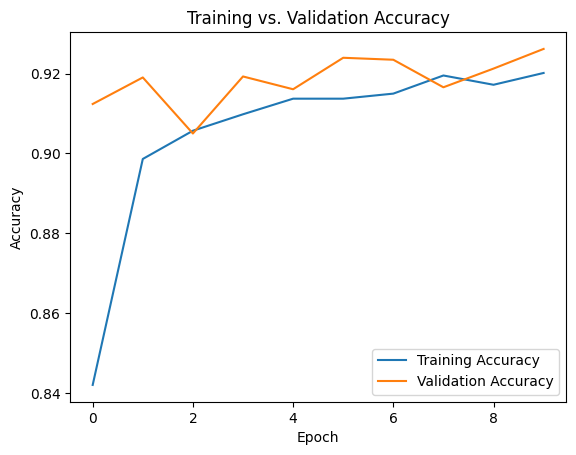

In [ ]:
# Plot training & validation accuracy
plt.plot(cnn_model_history2.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

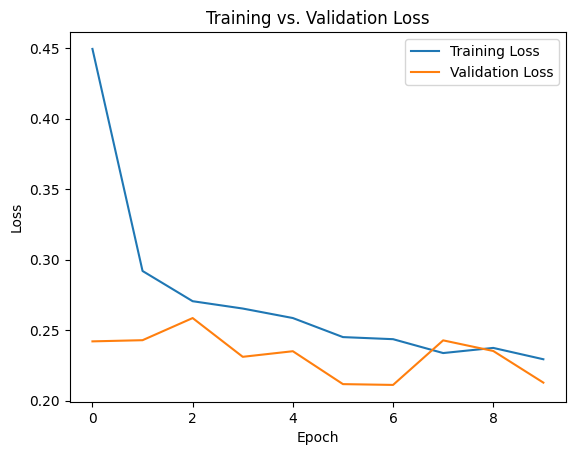

In [ ]:
# Plot training & validation loss
plt.plot(cnn_model_history2.history['loss'], label='Training Loss')
plt.plot(cnn_model_history2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Increasing the convolutional Layers to 4 with a dropout of 0.7

In [ ]:
# Initializing a sequential model
cnn_model3 = Sequential()
# Adding Conv1D layers
cnn_model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001), input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model3.add(Conv1D(filters=64, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))
cnn_model3.add(Conv1D(filters=128, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))
cnn_model3.add(Conv1D(filters=256, kernel_size=3, padding='same', activation=LeakyReLU(alpha=0.001)))

# Adding MaxPooling, Dropout, and Flatten layers
cnn_model3.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
cnn_model3.add(Dropout(0.7))
cnn_model3.add(Flatten())

# Adding Dense layers
cnn_model3.add(Dense(256, activation=LeakyReLU(alpha=0.001)))  # 256 neurons
cnn_model3.add(Dense(512, activation=LeakyReLU(alpha=0.001)))  # 512 neurons
cnn_model3.add(Dense(7, activation='softmax'))  # 7 output classes

# Model Compilation and Training
# Compiling the model
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 8, 32)             128       
                                                                 
 conv1d_15 (Conv1D)          (None, 8, 64)             6208      
                                                                 
 conv1d_16 (Conv1D)          (None, 8, 128)            24704     
                                                                 
 conv1d_17 (Conv1D)          (None, 8, 256)            98560     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 4, 256)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 4, 256)            0         
                                                      

In [ ]:
# Training the model
cnn_model_history3 = cnn_model3.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
75/75 [==============================] - 5s 41ms/step - loss: 0.6614 - accuracy: 0.7622 - val_loss: 0.2771 - val_accuracy: 0.8932
Epoch 2/10
75/75 [==============================] - 3s 38ms/step - loss: 0.2845 - accuracy: 0.8979 - val_loss: 0.2574 - val_accuracy: 0.9143
Epoch 3/10
75/75 [==============================] - 4s 50ms/step - loss: 0.2507 - accuracy: 0.9093 - val_loss: 0.2130 - val_accuracy: 0.9237
Epoch 4/10
75/75 [==============================] - 4s 51ms/step - loss: 0.2410 - accuracy: 0.9157 - val_loss: 0.2077 - val_accuracy: 0.9271
Epoch 5/10
75/75 [==============================] - 3s 39ms/step - loss: 0.2257 - accuracy: 0.9193 - val_loss: 0.2255 - val_accuracy: 0.9237
Epoch 6/10
75/75 [==============================] - 3s 38ms/step - loss: 0.2259 - accuracy: 0.9185 - val_loss: 0.2069 - val_accuracy: 0.9259
Epoch 7/10
75/75 [==============================] - 3s 43ms/step - loss: 0.2263 - accuracy: 0.9203 - val_loss: 0.2129 - val_accuracy: 0.9220
Epoch 8/10
75

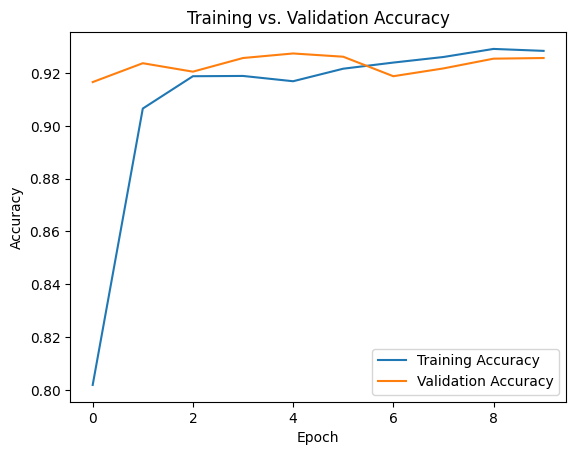

In [ ]:
# Plot training & validation accuracy
plt.plot(cnn_model_history3.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

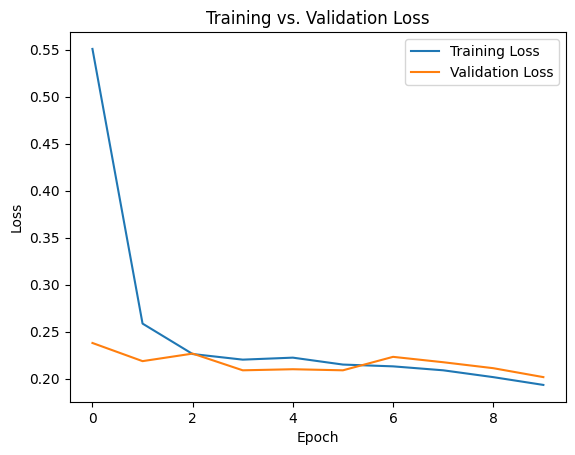

In [ ]:
# Plot training & validation loss
plt.plot(cnn_model_history3.history['loss'], label='Training Loss')
plt.plot(cnn_model_history3.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## TASK 4 - CLUSTERING

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [ ]:
# Remove the class_encoded column from the dataset
X = data.drop('Class_encoded', axis=1)

### Clustering Method 1: KMEANS Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)


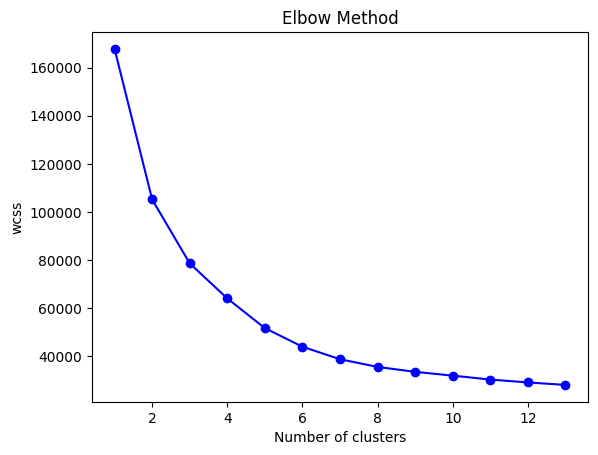

In [ ]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss, color='blue', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

As seen from the graph, the suitable number of clusters is 5.

In [ ]:
# Fit K-Means clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to data
y_kmeans = kmeans.labels_

In [ ]:
# Applying pca for dimentionality reduction
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)

In [ ]:
data_scaled_pca.shape

(13543, 2)

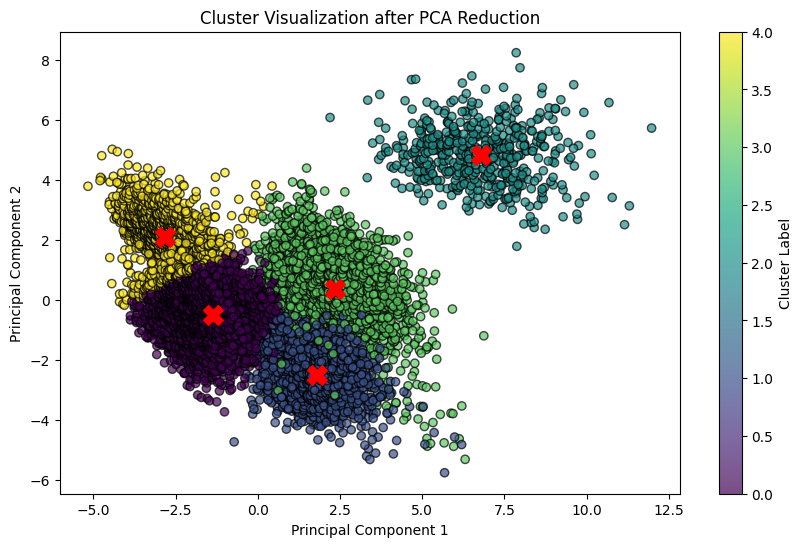

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Cluster Visualization after PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Creating a colorbar with labels
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Label')

# Adding annotations for each cluster center
for i, center in enumerate(pca.transform(kmeans.cluster_centers_)):
    plt.scatter(center[0], center[1], s=200, c='red', marker='X')

plt.show()


#### Clustering Method 2: Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

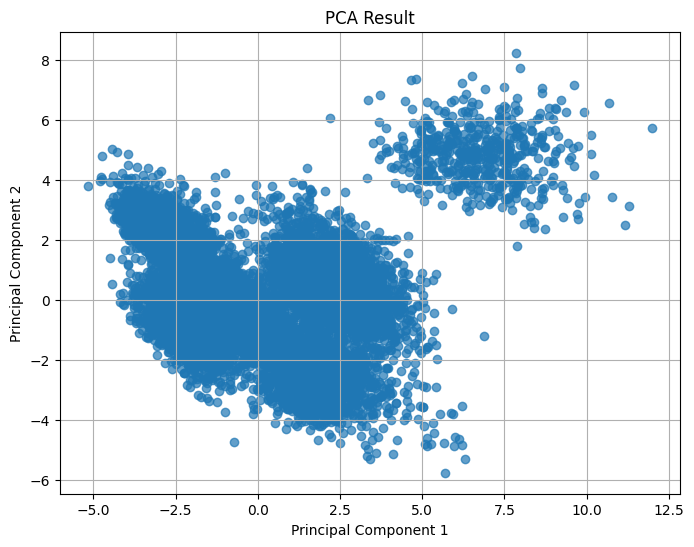

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()


In [ ]:
# Generate the linkage matrix
linkage_matrix = linkage(pca_data, method='ward', metric='euclidean')


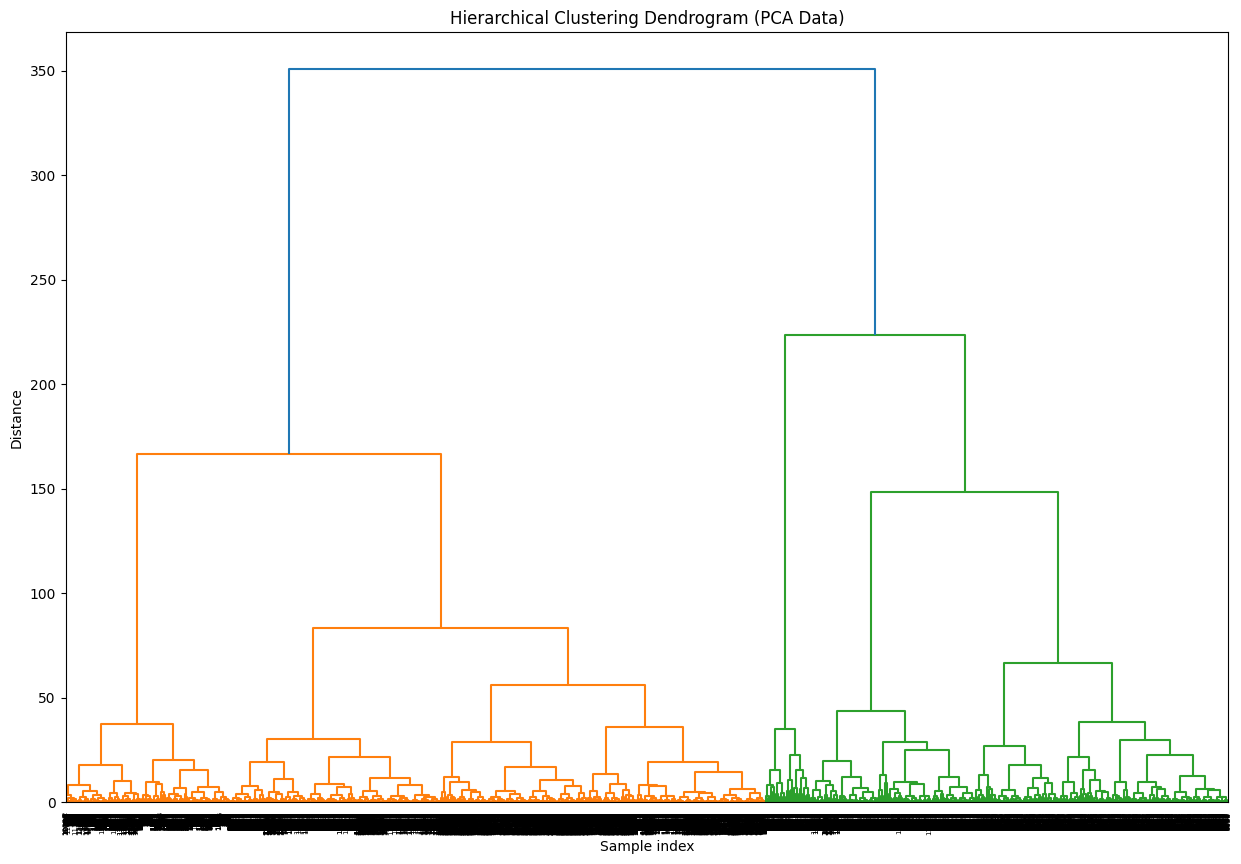

In [ ]:
# Plotting the dendogram to find the optimal number of clusters
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (PCA Data)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Performing Agglomerative Clustering
n_clusters = 5  # Chosen based on the dendrogram
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(pca_data)

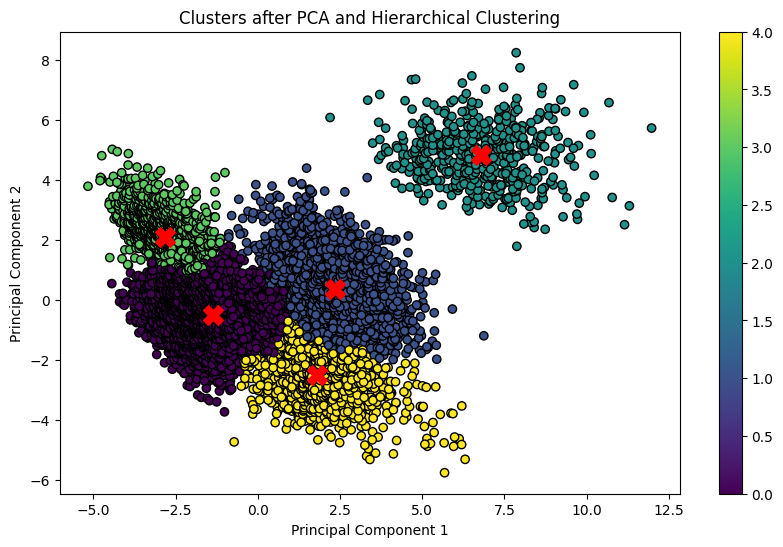

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('Clusters after PCA and Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)

# Adding annotations for each cluster center
for i, center in enumerate(pca.transform(kmeans.cluster_centers_)):
    plt.scatter(center[0], center[1], s=200, c='red', marker='X')
plt.show()


#### Clustering Method 3: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It has to do with identifying clusters based on density rather than distance, as in K-Means.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
clusters = dbscan.fit_predict(pca_data)

# Number of clusters in labels, noisy sample given -1
n_clusters = len(set(labels)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Print the unique cluster labels and noise
print("Unique cluster labels:", set(clusters))
print("Unique noise points:", n_noise)


Unique cluster labels: {0, 1, -1}
Unique noise points: 16


After several parameter tuning of eps and min_samples, the maximum cluster results with minimum noise was 3.

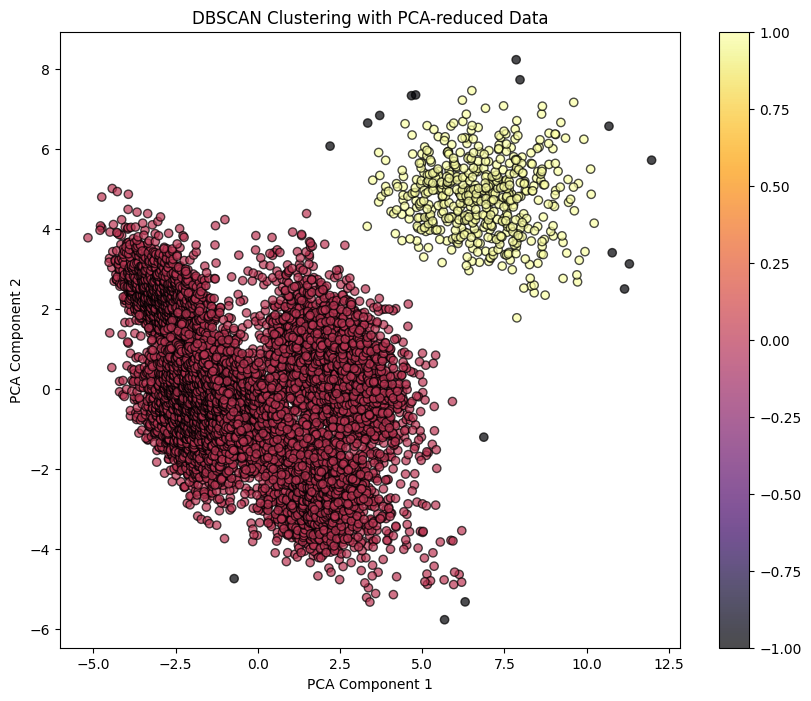

In [ ]:
# Plotting the PCA-reduced data with DBSCAN cluster assignments
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='inferno', edgecolor='k', alpha=0.7)
plt.colorbar(scatter)
plt.title('DBSCAN Clustering with PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### ADVANCED TASK

#### Using other Classification Methods

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying robust scaler
scaler = RobustScaler()

# Fit the scaler to the training data only
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.021952,0.365037,-0.179728,0.450337,-0.920714,-1.343303,0.022737,-1.235469,-4.927389,-2.065323,1.027146,-0.412287,0.487114,1.078241,-0.831565
1,0.375760,0.572015,0.553939,0.023995,1.211014,0.878029,0.371612,-0.041971,-4.329791,-1.570507,-1.142392,0.074954,-0.574479,-1.088006,-5.036688
2,-0.277165,-0.265818,-0.148871,-0.480705,0.212667,0.202500,-0.300241,-0.546429,0.907556,0.314461,-0.192822,0.540382,0.053412,-0.191858,0.340841
3,1.124463,0.901775,0.755386,1.117223,0.291520,0.270962,1.025228,-0.497907,-0.125094,-0.457225,-0.265133,-0.939315,-0.457347,-0.262948,0.386944
4,4.776367,2.871431,2.524219,3.867114,0.628551,0.529898,3.394305,-0.885242,-4.861774,-0.663267,-0.662743,-2.134799,-0.949167,-0.645455,-4.023232


##### Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression model
logR = LogisticRegression()

# Training the model
logR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # Regularization strengths
    'logistic__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],  # Solver options
    'logistic__max_iter': [100, 500, 1000]  # Maximum iterations
}

In [ ]:
# Create a pipeline that combines PCA and logistic regression
pipeline = Pipeline([
    ('pca', PCA(n_components=0.99)),  # Retain 99% of variance
    ('logistic', LogisticRegression())
])

In [ ]:
# Using Gridsearch to check for optimal parameters
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring= 'accuracy')

# Fit GridSearchCV to the scaled training data
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'logistic__C': 100, 'logistic__max_iter': 1000, 'logistic__solver': 'saga'}
Best cross-validation score: 0.93


In [ ]:
# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_score))

# You can also generate a detailed classification report
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Test accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       396
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.93       473
           3       0.93      0.91      0.92      1065
           4       0.95      0.96      0.96       553
           5       0.94      0.94      0.94       618
           6       0.84      0.87      0.86       797

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



Accuracy is 92%.

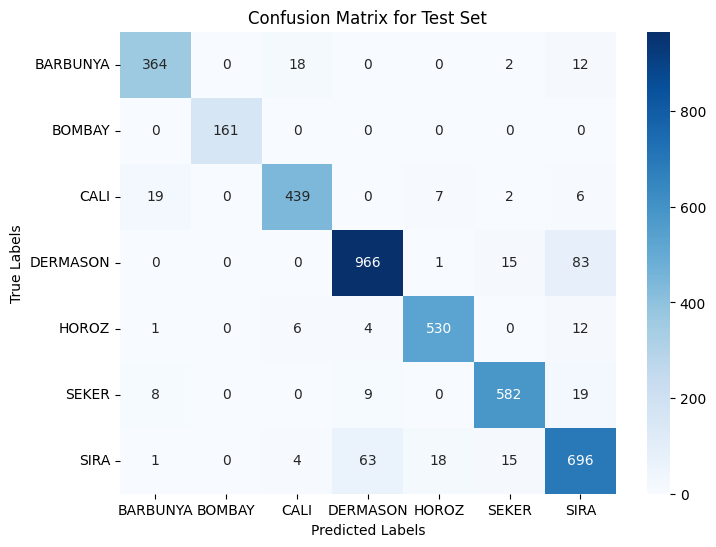

In [ ]:
# Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for the test set
plot_confusion_matrix(c_matrix, title='Confusion Matrix for Test Set', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

#### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create a pipeline with PCA and XGBClassifier
pipeline = Pipeline([
    ('pca', PCA(n_components=0.999)),
    ('xgb', XGBClassifier())
])

In [ ]:
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.7, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.9, 1.0]
}

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.021952,0.365037,-0.179728,0.450337,-0.920714,-1.343303,0.022737,-1.235469,-4.927389,-2.065323,1.027146,-0.412287,0.487114,1.078241,-0.831565
1,0.375760,0.572015,0.553939,0.023995,1.211014,0.878029,0.371612,-0.041971,-4.329791,-1.570507,-1.142392,0.074954,-0.574479,-1.088006,-5.036688
2,-0.277165,-0.265818,-0.148871,-0.480705,0.212667,0.202500,-0.300241,-0.546429,0.907556,0.314461,-0.192822,0.540382,0.053412,-0.191858,0.340841
3,1.124463,0.901775,0.755386,1.117223,0.291520,0.270962,1.025228,-0.497907,-0.125094,-0.457225,-0.265133,-0.939315,-0.457347,-0.262948,0.386944
4,4.776367,2.871431,2.524219,3.867114,0.628551,0.529898,3.394305,-0.885242,-4.861774,-0.663267,-0.662743,-2.134799,-0.949167,-0.645455,-4.023232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,1.534628,1.178174,1.233638,1.089162,1.223737,0.884527,1.347352,0.561572,0.602079,-0.539374,-1.053326,-0.905948,-0.763878,-1.007390,-0.493177
9476,-0.158264,-0.167056,-0.129892,-0.188866,-0.123910,-0.131646,-0.168289,0.213129,0.282138,0.344489,0.141531,0.187949,0.144604,0.142947,0.492018
9477,1.801858,1.319353,1.301342,1.441581,0.947298,0.733518,1.546538,0.365238,0.701908,-0.443949,-0.844223,-1.129990,-0.743338,-0.815327,-0.560163
9478,-0.243731,-0.299650,-0.399953,0.143570,-1.116948,-1.795707,-0.262621,-0.104846,0.482266,0.848255,1.326828,-0.159384,0.844142,1.410673,0.572208


In [ ]:
y_train

1746     5
6489     4
13085    3
2873     0
3547     1
        ..
5191     2
13486    3
5390     2
860      5
7336     4
Name: Class_encoded, Length: 9480, dtype: int64

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy and classification report
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for the test set
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for Test Set', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

#### K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create a pipeline that combines PCA and KNN
pipeline = Pipeline([
    ('pca', PCA(n_components=0.999)),
    ('knn', KNeighborsClassifier())
])

In [ ]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],  # Different values for k
    'knn__metric': ['euclidean', 'manhattan'],  # Distance calculation methods
    'knn__weights': ['uniform', 'distance']  # Weight types
}

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding cross-validation score
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
Best cross-validation score: 0.92


In [ ]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("kNearest Neighbor Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

kNearest Neighbor Classifier Accuracy: 0.9217327098203298
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       396
           1       1.00      1.00      1.00       161
           2       0.91      0.94      0.93       473
           3       0.91      0.93      0.92      1065
           4       0.96      0.95      0.95       553
           5       0.95      0.95      0.95       618
           6       0.88      0.86      0.87       797

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



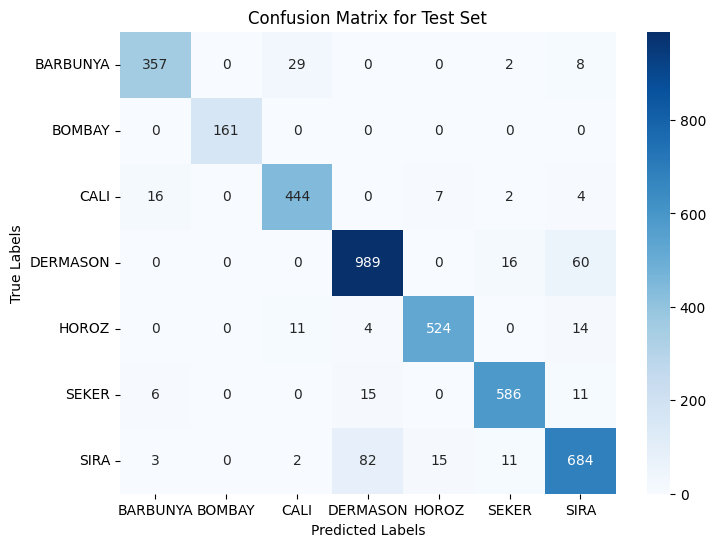

In [ ]:
# Confusion Matrix
conf_matri = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for the test set
plot_confusion_matrix(conf_matri, title='Confusion Matrix for Test Set', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

#### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Applying robust scaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a pipeline with PCA and AdaBoost
pipeline = Pipeline([
    ('pca', PCA(n_components=0.999)),  # Retain 99% of variance
    ('adaboost', AdaBoostClassifier())
])

In [ ]:
param_grid = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}


In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_model = grid.best_estimator_

# Print the best parameters and the corresponding cross-validation score
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 100}
Best cross-validation score: 0.59


In [ ]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("kNearest Neighbor Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

kNearest Neighbor Classifier Accuracy: 0.49864632045286733
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.53      0.62      0.58       396
      BOMBAY       0.00      0.00      0.00       161
        CALI       0.73      0.92      0.81       473
    DERMASON       0.57      0.09      0.16      1065
       HOROZ       0.95      0.90      0.92       553
       SEKER       0.93      0.09      0.17       618
        SIRA       0.31      0.87      0.46       797

    accuracy                           0.50      4063
   macro avg       0.58      0.50      0.44      4063
weighted avg       0.62      0.50      0.43      4063



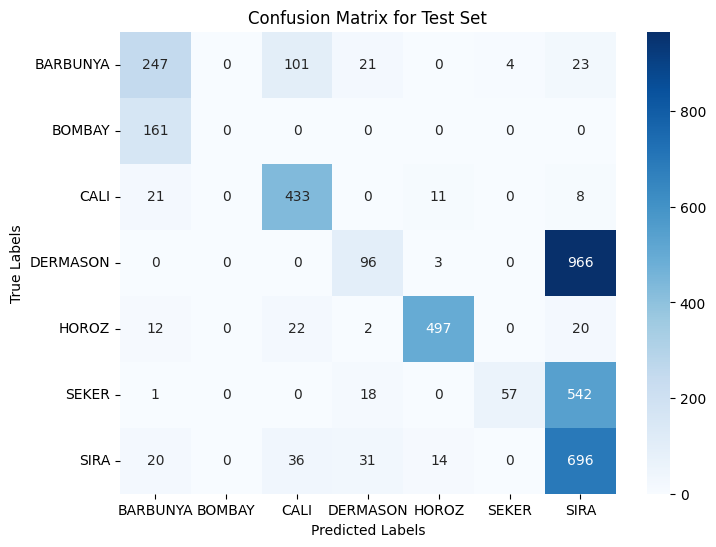

In [ ]:
# Confusion Matrix
con_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for the test set
plot_confusion_matrix(con_matrix, title='Confusion Matrix for Test Set', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])

#### Naive Bayes Classifier

Gaussian Naive Bayes would be used because the data is normalized using robust scaler. It assumes that the continuous values associated with each feature are distributed according to a Gaussian distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Applying robust scaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Fit the classifier to the scaled training data
gnb.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = gnb.predict(X_test)

In [ ]:
# Evaluating the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Naive Bayes Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

kNearest Neighbor Classifier Accuracy: 0.8951513659857249
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.82      0.84       396
      BOMBAY       0.99      1.00      1.00       161
        CALI       0.86      0.90      0.88       473
    DERMASON       0.93      0.87      0.90      1065
       HOROZ       0.94      0.96      0.95       553
       SEKER       0.93      0.95      0.94       618
        SIRA       0.82      0.86      0.84       797

    accuracy                           0.90      4063
   macro avg       0.90      0.91      0.91      4063
weighted avg       0.90      0.90      0.90      4063



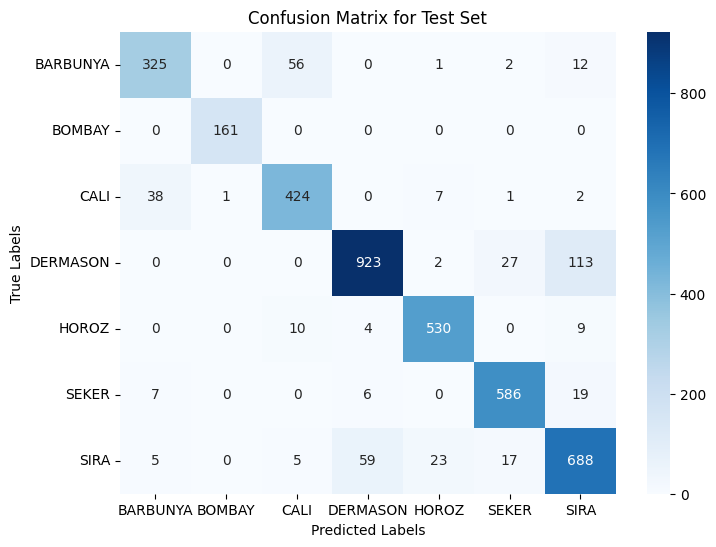

In [ ]:
# Confusion Matrix
confu_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for the test set
plot_confusion_matrix(confu_matrix, title='Confusion Matrix for Test Set', labels=["BARBUNYA", "BOMBAY", "CALI","DERMASON","HOROZ","SEKER","SIRA"])